## Predicting house prices

The idea is borrowed from  Chollet (2017, p.85) [Git link](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb)

Solves regression problem using scikit LinReg and a fully connected NN designed with Keras.

See Chollet [Git link](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb) for K-fold validation.

Given datappoints about the housing in Boston in mid 70's, predict sale price

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [24]:
#%tensorflow_version 1.x
from keras.datasets import boston_housing

In [25]:
#scikit version has descriptions:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
#Format: Dictionary 
# print(boston.keys())
#Size it up
print(boston.data.shape)
#What are the 13 features?
print(boston.feature_names)

boston.target.shape

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506,)

In [27]:
#info on the data.
#pandas are pretty. 
df = pd.DataFrame(boston.data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Normalize data

0 mean and unit variance

Note: we should technically use only the train data here. 

In [28]:
X = boston.data
y = boston.target
print(X.shape, y.shape)

X -= X.mean(0)
X /= X.std(0)

df = pd.DataFrame(X)
df.describe()


(506, 13) (506,)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,-3.510587e-18,-3.117401e-15,-2.808469e-17,2.724215e-15,-1.147260e-14,-1.151472e-15,7.582867e-16,0.000000,5.616939e-17,-1.022283e-14,8.607958e-15,-5.897786e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-0.982843,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-0.637962,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-0.523001,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=0.8)

print(Xtrain.shape, ytrain.shape)

(404, 13) (404,)


In [30]:
print("Attributes:\n", Xtrain[:3], "\n Prices:\n", ytrain[:3])

Attributes:
 [[ 1.32780421 -0.48772236  1.01599907 -0.27259857  0.51229565 -1.39706929
   1.02148094 -0.80543822  1.66124525  1.53092646  0.80657583 -0.07887794
   1.7181012 ]
 [-0.34750602 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.64200019
  -0.42939039  0.33444943 -0.6379618  -0.6012761   1.17646583  0.42701755
  -0.5863558 ]
 [-0.41648392  1.01446252 -0.74074945 -0.27259857 -1.00891427 -0.36134243
  -1.61000138  1.35273767 -0.98284286 -0.61909395 -0.71922039  0.06113692
  -0.67606702]] 
 Prices:
 [12.  19.9 19.4]


## Linear Regression

[Diabetes dataset Linear Regression Model example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In [33]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#SciKit Lin Reg using the train/test split:
#1. Create a model
#2. Train
#3. Predict

#ME
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


MSE Linear Regression: 24.29
MAE Linear Regression: 3.19


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

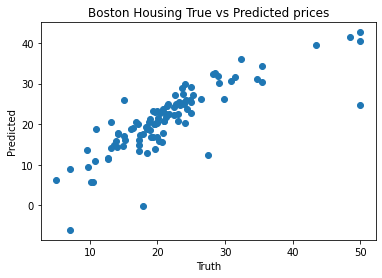

In [36]:
#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
mae = mean_absolute_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)
print("MAE Linear Regression: %.2f" % mae)


#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

### Solution

What did the model learn?

In [37]:
# Model weights:
print("Model intercept:", model.intercept_)
print("Model slopes:    ", model.coef_)

Model intercept: 22.485268239316913
Model slopes:     [-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]


### Bonus

Add poly features via a pipeline

What is a good degree for this model?

[make_pipeline documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#ME
model = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))


MSE Linear Regression: 14.25


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

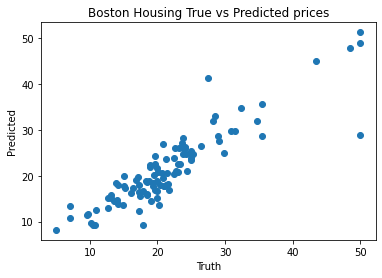

In [13]:
#train and evaluate 

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

## Dense NN using Keras

In [48]:
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
# define model

#Dense is a fully-connected NN: activation(dot(input, kernel) + bias)

def ex_model():
	# Add layers in given order
  model = Sequential() 
  #Seq: indicates we want to define the NN layer by layer;
  #each layer stacks on top of the next. 
  #comes with fit,eval,predict. (and corresponding generators)
  
  model.add(Dense(13, input_shape=(Xtrain.shape[1],), activation='relu'))
  #we only need input size for the first layer. After that, it will auto-fill.

  model.add(Dense(1))
  #no actications for the output layer. used for predicting a continous value.
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  return model


Epoch 1/10
404/404 [==============================] - 4s 9ms/step - loss: 521.2852 - mae: 20.9997
Epoch 2/10
404/404 [==============================] - 2s 4ms/step - loss: 278.1213 - mae: 14.2838
Epoch 3/10
404/404 [==============================] - 2s 4ms/step - loss: 118.5908 - mae: 8.1361
Epoch 4/10
404/404 [==============================] - 1s 4ms/step - loss: 66.2911 - mae: 5.8111
Epoch 5/10
404/404 [==============================] - 2s 4ms/step - loss: 46.1701 - mae: 4.7597
Epoch 6/10
404/404 [==============================] - 2s 4ms/step - loss: 37.2065 - mae: 4.3112
Epoch 7/10
404/404 [==============================] - 1s 4ms/step - loss: 32.7506 - mae: 4.0335
Epoch 8/10
404/404 [==============================] - 1s 4ms/step - loss: 30.1640 - mae: 3.9136
Epoch 9/10
404/404 [==============================] - 2s 4ms/step - loss: 28.0075 - mae: 3.8077
Epoch 10/10
404/404 [==============================] - 2s 4ms/step - loss: 26.3848 - mae: 3.7133
MSE Keras example: 26.73


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

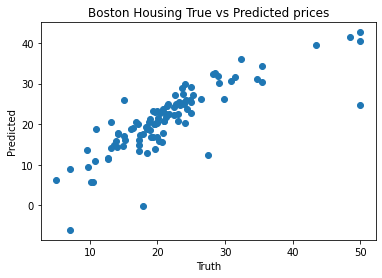

In [50]:
model = ex_model()
ne = 10 #number of train loops
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)
#see performance on test data using trained model
y_nn = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("MSE Keras example: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

In [51]:
#alternative approach with cross-validation
#model object
# estimator = KerasRegressor(build_fn=ex_model, epochs=100, batch_size=5, verbose=1)
# 
# cvf = KFold(n_splits=2)
# results = cross_val_score(estimator, X, y, cv=cvf)
# print("Results: %.2f (+/-%.2f) MSE" % (results.mean(), results.std()))

# Results: -88.81 (46.90) MSE

## Exercise

Tune your own neural network to beat linear regression:

`MSE Linear Regression: 24.29`

What should I change? 
- train time: What is a good *ne* (number of train loops/epochs)? 
- Make the network deeper/wider
  - tune # of layers/neurons in the model. 

### Larger model example

#### How to create a deeper model?
Add another layer to your model to make it more flexible <br>

#### How to create wider models?
increase 13 to 30.



**Con:** The larger the model, the more coeff you have to train. This requires:
- more data 
- more training time
If you don't have enough data, your model will *overfit* and won't be able to generalize.


In [60]:

def my_model():
	# Add layers in given order  
  model = Sequential()
  model.add(Dense(32, input_shape=(Xtrain.shape[1],), activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  return model

ne = 10 #number of train loops

#Train
model = my_model()
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)

#Test
#see performance on test data using trained model
y_nn = model.predict(Xtest)
#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("Test: MSE my network: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

ValueError: Input 0 is incompatible with layer conv2d_4: expected ndim=4, found ndim=2

### What did we learn?

In [19]:
weights, bias = model.layers[1].get_weights()

print('Weights size: \n', weights.shape)
      
print('Weights: \n', weights,'\n Bias: \n' ,bias)

Weights size: 
 (32, 16)
Weights: 
 [[-0.24464992 -0.01455279  0.3645268  -0.31724238 -0.03500197  0.33703807
  -0.20497718  0.45094746  0.45387447  0.294976    0.2509227   0.10620466
   0.24869469  0.41054648  0.36896023  0.381716  ]
 [ 0.25178066 -0.00961174  0.28979626  0.11501921 -0.06258793  0.54793304
   0.10211495  0.28175333  0.25410175 -0.06079455  0.21536128  0.19837707
  -0.19587031 -0.0083468   0.30687225 -0.05739355]
 [ 0.2564779  -0.31990275  0.31553194  0.01421601  0.06414808  0.14736192
   0.05017451  0.3520996   0.29659805  0.42534143  0.02840512  0.3709568
   0.39612365  0.1251103  -0.15023455  0.33117118]
 [ 0.12270144  0.08556367 -0.12620376  0.17272429  0.28032658  0.2066213
   0.10957047  0.24120888 -0.04481984 -0.05406637 -0.07414671  0.14249595
  -0.0917671   0.1853638   0.14937884  0.01581087]
 [ 0.2978304  -0.28834513  0.08216019 -0.459939    0.24013853 -0.29036185
  -0.16470253 -0.20650628 -0.30082592  0.3031941  -0.19432095 -0.1744619
   0.18125641 -0.344165